<a href="https://colab.research.google.com/github/vigeecarolina/first_report/blob/master/SUP_ML_1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEMPLATE 1 - PREPROCESSING

# Libraries

In [ ]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab
from sklearn.compose import make_column_selector as selector


import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

# Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NUCLIO DSC ML SUPERVISADO - Compartida 2/“DSC0922 – Entregable SupML - {Rojas}”/malware_traintest.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [ ]:
df.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.0,0,NaN,...,19951.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.0,0,NaN,...,48753.0,0,0.0,0.0,0,0,0.0,1.0,3.0,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.0,0,NaN,...,33111.0,1,0.0,0.0,1,1,0.0,0.0,15.0,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.0,0,NaN,...,48473.0,1,NaN,0.0,0,0,0.0,0.0,15.0,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.0,0,NaN,...,4343.0,1,NaN,0.0,1,0,0.0,1.0,13.0,1


In [ ]:
df[df.duplicated(keep=False)]

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections


In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

# Define target

In [ ]:
target = 'HasDetections'

# Preprocessing

In [ ]:
Numerical = selector(dtype_exclude="object")
categorical = selector(dtype_include = "object")
Numerical_columns= Numerical(df)
categorical_columns = categorical(df)
binary_columns = [col for col in Numerical_columns if len(df[col].dropna().unique()) == 2]
Numerical_columns = [col for col in Numerical_columns if col not in binary_columns]
binary_columns.remove(target)
numerical_float_columns = ['Census_SystemVolumeTotalCapacity','Census_InternalBatteryNumberOfCharges','CountryIdentifier']


In [ ]:
#categorical_columns.append(col)

In [ ]:
for col in categorical_columns:
    df[col] = df[col].astype(object)

In [ ]:
l_cat_ordinal = ['Census_InternalPrimaryDiagonalDisplaySizeInInches','Census_InternalPrimaryDisplayResolutionHorizontal', 'AppVersion','AvSigVersion',
'Census_InternalPrimaryDisplayResolutionVertical','Census_OSInstallLanguageIdentifier'] 

In [ ]:
df['AppVersion'] = df['AppVersion'].str[0:4]

In [ ]:
df['AvSigVersion'] = df['AvSigVersion'].str[0:4]

In [ ]:
df['EngineVersion'].str[4:9].astype('int').sort_values(ascending= False).unique()

array([15300, 15200, 15100, 15000, 14901, 14800, 14700, 14600, 14500,
       14405, 14306, 14305, 14303, 14202, 14201, 14104, 14103, 14102,
       14003, 14002, 14001, 13903, 13902, 13804, 13803, 13802, 13704,
       13701, 13601, 13504, 13407, 13406, 13303, 13202, 13103, 13102,
       13000, 12902, 12805, 12804, 12706, 12603, 12400, 12101, 11701,
       10401])

In [ ]:
df['EngineVersion'] = np.where(df['EngineVersion'].str[4:9].isin(['15200','15100','15000','14901']),df['EngineVersion'].str[4:9]
,"otros")

In [ ]:
mapeos = {"15200" : "1",
                     "15100" : "2",
                     "15000" : "3",
                     "14901" : "4",
"otros":"otros"}



df["EngineVersion"] = df["EngineVersion"].map(mapeos)

In [ ]:
df['EngineVersion'].value_counts()

1        216491
2        205494
otros     51070
3         14890
4         12055
Name: EngineVersion, dtype: int64

In [ ]:
df['AppVersion'].value_counts()

4.18    337243
4.12     30836
4.13     29076
4.10     25633
4.9.     23256
4.8.     15309
4.14     13727
4.16     13189
4.11     11458
4.5.       126
4.7.        46
4.6.        44
4.4.        27
4.17        22
4.15         8
Name: AppVersion, dtype: int64

In [ ]:
df['AvSigVersion'].value_counts()

1.27    447343
1.26     34152
1.25      9678
1.23      5539
1.24      2372
1.22       896
1.20         7
1.21         5
0.0.         4
1.19         3
1.16         1
Name: AvSigVersion, dtype: int64

In [ ]:
for col in df[categorical_columns]:
  if col in l_cat_ordinal:
    categorical_columns.remove(col)

In [ ]:
numerical_float_columns

['Census_SystemVolumeTotalCapacity',
 'Census_InternalBatteryNumberOfCharges',
 'CountryIdentifier']

In [ ]:
categorical_columns

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#enc = OrdinalEncoder

In [ ]:
#for col in df[l_cat_ordinal]:
  #df[col] = OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
  #print(df[col].value_counts())

In [ ]:
df.shape

(500000, 83)

In [ ]:
#df_sub = df.sample(50,random_state=42)

In [ ]:
#df_sub.shape

## EDA: Analysis

### Target distribution

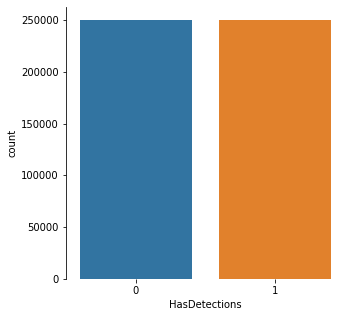

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(x="HasDetections", data=df, label="Label Count")
sns.despine(bottom=True)

### Univariate analysis

* En numericas .describe() para describir, KDEplots, distplots o histogramas en variables numericas para visualizar.
* En categoricas .value_counts() para describir, countplots o barplots para visualizar.

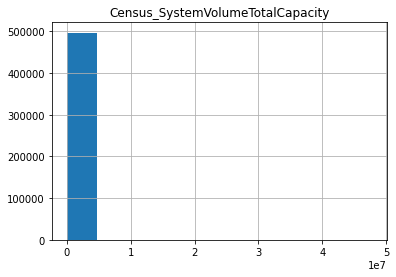

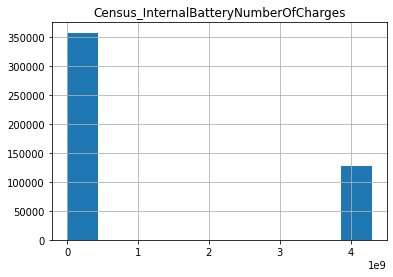

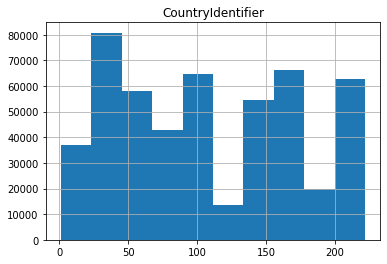

In [ ]:
for i in numerical_float_columns:
  df.hist(i)

In [ ]:
df["Census_TotalPhysicalRAM"].value_counts()

4096.0     228678
8192.0     123174
2048.0      61694
16384.0     30179
6144.0      22349
            ...  
12963.0         1
5791.0          1
4124.0          1
5039.0          1
4120.0          1
Name: Census_TotalPhysicalRAM, Length: 552, dtype: int64

In [ ]:
df["Census_TotalPhysicalRAM"] = np.where(df["Census_TotalPhysicalRAM"]<=4096,"<=4gb","+4gb")

In [ ]:
df['Census_ProcessorCoreCount'] = np.where(df['Census_ProcessorCoreCount'].isin([4.0,2.0]),df['Census_ProcessorCoreCount']
,"otros")

In [ ]:
df['Census_ProcessorCoreCount'].value_counts()

4.0      304102
2.0      129178
otros     66720
Name: Census_ProcessorCoreCount, dtype: int64

In [ ]:
df["Census_PrimaryDiskTotalCapacity"].value_counts()

476940.0    158683
953869.0    122183
305245.0     26687
122104.0     26444
244198.0     25159
             ...  
948333.0         1
20646.0          1
122069.0         1
190652.0         1
152499.0         1
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: int64

In [ ]:
df["Census_PrimaryDiskTotalCapacity"] = np.where(df["Census_PrimaryDiskTotalCapacity"]<=512600,"<=500gb","+500gb")

In [ ]:
df["Census_SystemVolumeTotalCapacity"].value_counts()

28542.0     2922
926992.0    2866
476389.0    2380
476324.0    2306
102400.0    2303
            ... 
221517.0       1
580181.0       1
127615.0       1
236484.0       1
470309.0       1
Name: Census_SystemVolumeTotalCapacity, Length: 142051, dtype: int64

In [ ]:
for i in numerical_float_columns:
  print(df[i].value_counts())

28542.0     2922
926992.0    2866
476389.0    2380
476324.0    2306
102400.0    2303
            ... 
221517.0       1
580181.0       1
127615.0       1
236484.0       1
470309.0       1
Name: Census_SystemVolumeTotalCapacity, Length: 142051, dtype: int64
0.000000e+00    283189
4.294967e+09    126436
1.000000e+00      2955
1.600000e+01      1517
2.000000e+00      1503
                 ...  
8.331000e+03         1
5.772700e+04         1
1.030000e+03         1
4.354400e+04         1
1.900000e+03         1
Name: Census_InternalBatteryNumberOfCharges, Length: 5248, dtype: int64
43     22339
29     19273
141    18420
93     16205
171    15743
       ...  
212       13
37        12
165       11
217       10
193        9
Name: CountryIdentifier, Length: 222, dtype: int64


In [ ]:
for i in binary_columns:
  print(df[i].value_counts())

0    499999
1         1
Name: IsBeta, dtype: int64
0    491379
1      8621
Name: IsSxsPassiveMode, dtype: int64
1    493908
0      6092
Name: HasTpm, dtype: int64
1.0    471073
0.0     27001
Name: IsProtected, dtype: int64
0    499986
1        14
Name: AutoSampleOptIn, dtype: int64
0.0    469946
1.0       206
Name: SMode, dtype: int64
1.0    484071
0.0     10767
Name: Firewall, dtype: int64
0    461483
1     38517
Name: Census_HasOpticalDiskDrive, dtype: int64
0    499739
1       261
Name: Census_IsPortableOperatingSystem, dtype: int64
0.0    84773
1.0        2
Name: Census_IsFlightingInternal, dtype: int64
0.0    491060
1.0         7
Name: Census_IsFlightsDisabled, dtype: int64
0.0    181849
1.0        47
Name: Census_ThresholdOptIn, dtype: int64
0    257281
1    242719
Name: Census_IsSecureBootEnabled, dtype: int64
0.0    495572
1.0      3527
Name: Census_IsVirtualDevice, dtype: int64
0    437283
1     62717
Name: Census_IsTouchEnabled, dtype: int64
0    481128
1     18872
Name: Cens

In [ ]:
df['OsSuite'].value_counts()

768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: OsSuite, dtype: int64

In [ ]:
df.drop(columns=["IsBeta", "IsSxsPassiveMode",'HasTpm',"IsProtected","AutoSampleOptIn","SMode","Firewall","Census_IsPortableOperatingSystem","Census_IsFlightingInternal","Census_IsFlightsDisabled","Census_IsFlightsDisabled","Census_ThresholdOptIn", "Census_IsVirtualDevice"], inplace=True)

In [ ]:
columnasborradas =["IsBeta", "IsSxsPassiveMode",'HasTpm',"IsProtected","AutoSampleOptIn","SMode","Firewall",
                   "Census_IsPortableOperatingSystem","Census_IsFlightingInternal",
                   "Census_IsFlightsDisabled","Census_IsFlightsDisabled","Census_ThresholdOptIn", "Census_IsVirtualDevice"]
binary_columns =[col for col in binary_columns if col not in columnasborradas]

In [ ]:
df.drop(columns=["MachineIdentifier", "ProductName", "RtpStateBitfield", "DefaultBrowsersIdentifier","Census_OEMNameIdentifier","Census_ProcessorModelIdentifier",
                 "Census_OEMModelIdentifier", "AVProductsEnabled", "CityIdentifier", "OrganizationIdentifier", "GeoNameIdentifier","Census_OSVersion",
                 "Platform", "Processor","PuaMode","UacLuaenable", "Census_DeviceFamily","Census_ChassisTypeName", "Census_InternalBatteryType",
                 "Census_OSBuildRevision", "Census_OSSkuName","Census_OSUILocaleIdentifier", "Census_GenuineStateName","Census_FlightRing","OsBuildLab",
                 "Census_PowerPlatformRoleName" ,"Census_FirmwareVersionIdentifier", "Census_IsWIMBootEnabled", "Wdft_RegionIdentifier","OsVer"], inplace=True)

In [ ]:
columnasborradas =["MachineIdentifier", "ProductName", "RtpStateBitfield", "DefaultBrowsersIdentifier","Census_OSVersion",
                     "AVProductsEnabled", "CityIdentifier", "OrganizationIdentifier", "GeoNameIdentifier","Platform", 
                   "Processor","PuaMode","UacLuaenable", "Census_DeviceFamily","Census_ChassisTypeName","OsBuildLab",
                   "Census_InternalBatteryType","Census_OSBuildRevision", "Census_OSSkuName","Census_OSUILocaleIdentifier",
                   "Census_GenuineStateName","Census_FlightRing","Census_FirmwareVersionIdentifier", "Census_IsWIMBootEnabled",'Census_ProcessorModelIdentifier',
                   "Wdft_RegionIdentifier","OsVer","Census_PowerPlatformRoleName", "Census_OEMNameIdentifier","Census_OEMModelIdentifier"]
categorical_columns =[col for col in categorical_columns if col not in columnasborradas]

In [ ]:
df['OsSuite'] = np.where(df['OsSuite'].isin([768,256]),df['OsSuite']
,"otros")

In [ ]:
df['SkuEdition'] = np.where(df['SkuEdition'].isin(["Home","Pro"]),df['SkuEdition']
,"otros")

In [ ]:
df["IeVerIdentifier"] =np.where(df["IeVerIdentifier"].astype('float')<=110,"<=110","+110")

In [ ]:
df['Census_MDC2FormFactor'] = np.where(df['Census_MDC2FormFactor'].isin(["Notebook","Desktop"]),df['Census_MDC2FormFactor']
,"otros")

In [ ]:
df['Census_PrimaryDiskTypeName'] = np.where(df['Census_PrimaryDiskTypeName'].isin(["HDD","SSD"]),df['Census_PrimaryDiskTypeName']
,"otros")

In [ ]:
df['Census_OSBuildNumber'] = np.where(df['Census_OSBuildNumber'].isin([17134,16299]),df['Census_OSBuildNumber']
,"otros")

In [ ]:
df['Census_OSEdition'] = np.where(df['Census_OSEdition'].isin(["Core","Prpfessional","CoreSingleLanguage"]),df['Census_OSEdition']
,"otros")

In [ ]:
df['Census_FirmwareManufacturerIdentifier'] = np.where(df['Census_FirmwareManufacturerIdentifier'].isin([142.0,628.0, 554.0, 355.0, 556.0]),df['Census_FirmwareManufacturerIdentifier']
,"otros")

In [ ]:
df['SmartScreen'] = np.where(df['SmartScreen'].isin(["RequireAdmin","ExistsNotSet"]),df['SmartScreen']
,"otros")

In [ ]:
df['Census_OSWUAutoUpdateOptionsName'] = np.where(df['Census_OSWUAutoUpdateOptionsName'].isin(["FullAuto","Notify"]),df['Census_OSWUAutoUpdateOptionsName']
,"otros")

In [ ]:
for i in categorical_columns:
  print(df[i].value_counts())

1        216491
2        205494
otros     51070
3         14890
4         12055
Name: EngineVersion, dtype: int64
rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: OsPlatformSubRelease, dtype: int64
Home     308567
Pro      181042
otros     10391
Name: SkuEdition, dtype: int64
RequireAdmin    241594
otros           199909
ExistsNotSet     58497
Name: SmartScreen, dtype: int64
Notebook    320948
Desktop     109527
otros        69525
Name: Census_MDC2FormFactor, dtype: int64
mid     1196
low      546
high     340
Name: Census_ProcessorClass, dtype: int64
HDD      325429
SSD      138155
otros     36416
Name: Census_PrimaryDiskTypeName, dtype: int64
amd64    454435
x86       45551
arm64        14
Name: Census_OSArchitecture, dtype: int64
rs4_release                  226001
rs3_release                   69216
rs3_release_svc_escrow        67027
rs2

In [ ]:
df.drop(columns=['Census_ProcessorClass','AVProductStatesIdentifier'], inplace=True)

### Multivariate analysis

* si el tamaño del dataset lo permite (<20 variables)
* scatterplotmatrix(), heatmap's correlation, etc

El tamaño del dataset es superior a 20 variables por lo que no permite realizar scatterplotmatrix() ni  heatmap's correlation.

## Data Cleaning

* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [ ]:
df[df.duplicated(keep=False)]

,EngineVersion,AppVersion,AvSigVersion,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,...,Census_OSInstallLanguageIdentifier,Census_OSWUAutoUpdateOptionsName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,HasDetections
221,1,4.18,1.27,2.0,29,171,15063,768,rs2,Home,...,26.0,Notify,OEM:DM,556.0,1,0,0,0.0,0.0,0
235,2,4.18,1.27,2.0,68,74,14393,768,rs1,Home,...,7.0,otros,OEM:DM,556.0,1,0,0,0.0,1.0,1
270,2,4.18,1.27,1.0,29,171,16299,256,rs3,Pro,...,26.0,otros,OEM:DM,142.0,1,0,0,0.0,0.0,0
297,1,4.18,1.27,1.0,44,218,17134,768,rs4,Home,...,9.0,FullAuto,OEM:DM,628.0,1,0,0,0.0,0.0,0
399,1,4.8.,1.27,2.0,66,88,10240,768,th1,Home,...,14.0,otros,OEM:DM,554.0,1,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499539,2,4.18,1.27,2.0,207,75,15063,768,rs2,Home,...,8.0,Notify,OEM:DM,554.0,1,0,0,0.0,0.0,1
499594,1,4.9.,1.27,1.0,60,233,10586,768,th2,Home,...,9.0,Notify,OEM:DM,554.0,1,0,0,0.0,0.0,1
499724,2,4.18,1.27,1.0,44,218,16299,768,rs3,Home,...,10.0,otros,OEM:DM,554.0,1,0,0,0.0,0.0,1
499738,2,4.11,1.27,1.0,107,134,15063,256,rs2,Pro,...,20.0,Notify,Retail,142.0,0,0,0,0.0,0.0,1


In [ ]:
df.drop_duplicates(inplace=True)

En el siguiente cuadro observaremos valores únicos, porcentaje de nulos y porcentaje de valores por categoría

In [ ]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
37,Wdft_IsGamer,2,3.391994,69.162999,float64
23,Census_InternalBatteryNumberOfCharges,5248,3.013099,56.567949,float64
36,Census_IsAlwaysOnAlwaysConnectedCapable,2,0.809768,93.506405,float64
29,Census_OSInstallLanguageIdentifier,39,0.667682,35.700625,float64
17,Census_SystemVolumeTotalCapacity,142051,0.596238,0.596238,float64
20,Census_InternalPrimaryDiagonalDisplaySizeInInches,520,0.532420,34.290806,float64
22,Census_InternalPrimaryDisplayResolutionVertical,514,0.531617,55.515753,float64
21,Census_InternalPrimaryDisplayResolutionHorizontal,474,0.531617,50.350498,float64
14,Census_ProcessorManufacturerIdentifier,4,0.470609,87.780634,float64
3,AVProductsInstalled,5,0.388929,69.601097,float64


## Nulls: impute values

* Imputar cero, valor fijo, media o moda

Eliminamos columnas con un porcentaje de nulos mayor al 95%

In [ ]:
porcentaje_nulos = df.isnull().sum()/len(df)*100

In [ ]:
columnas_eliminar = porcentaje_nulos[porcentaje_nulos > 95].index

In [ ]:
columnas_eliminar

Index([], dtype='object')

In [ ]:
df= df.drop(columnas_eliminar, axis=1)

In [ ]:
df.isna().sum()

EngineVersion                                            0
AppVersion                                               0
AvSigVersion                                             0
AVProductsInstalled                                   1938
CountryIdentifier                                        0
LocaleEnglishNameIdentifier                              0
OsBuild                                                  0
OsSuite                                                  0
OsPlatformSubRelease                                     0
SkuEdition                                               0
IeVerIdentifier                                          0
SmartScreen                                              0
Census_MDC2FormFactor                                    0
Census_ProcessorCoreCount                                0
Census_ProcessorManufacturerIdentifier                2345
Census_PrimaryDiskTotalCapacity                          0
Census_PrimaryDiskTypeName                              

In [ ]:
df[numerical_float_columns].isnull().sum()

Census_SystemVolumeTotalCapacity          2971
Census_InternalBatteryNumberOfCharges    15014
CountryIdentifier                            0
dtype: int64

In [ ]:
for col in df[numerical_float_columns]:
  df[col].fillna(0, inplace = True)

In [ ]:
columnasborradas =["Census_ProcessorClass", "AVProductStatesIdentifier"]
categorical_columns =[col for col in categorical_columns if col not in columnasborradas] 
categorical_columns += ['OsSuite','Census_ProcessorCoreCount','Census_ProcessorManufacturerIdentifier','Census_OSBuildNumber','Census_FirmwareManufacturerIdentifier','AVProductsInstalled']

In [ ]:
df[categorical_columns].isnull().sum()

EngineVersion                                0
OsPlatformSubRelease                         0
SkuEdition                                   0
SmartScreen                                  0
Census_MDC2FormFactor                        0
Census_PrimaryDiskTypeName                   0
Census_OSArchitecture                        0
Census_OSBranch                              0
Census_OSEdition                             0
Census_OSInstallTypeName                     0
Census_OSWUAutoUpdateOptionsName             0
Census_ActivationChannel                     0
OsSuite                                      0
Census_ProcessorCoreCount                    0
Census_ProcessorManufacturerIdentifier    2345
Census_OSBuildNumber                         0
Census_FirmwareManufacturerIdentifier        0
AVProductsInstalled                       1938
dtype: int64

In [ ]:
df.nunique()

EngineVersion                                             5
AppVersion                                               15
AvSigVersion                                             11
AVProductsInstalled                                       5
CountryIdentifier                                       222
LocaleEnglishNameIdentifier                             233
OsBuild                                                  48
OsSuite                                                   3
OsPlatformSubRelease                                      9
SkuEdition                                                3
IeVerIdentifier                                           2
SmartScreen                                               3
Census_MDC2FormFactor                                     3
Census_ProcessorCoreCount                                 3
Census_ProcessorManufacturerIdentifier                    4
Census_PrimaryDiskTotalCapacity                           2
Census_PrimaryDiskTypeName              

In [ ]:
df["AVProductsInstalled"].fillna("1", inplace = True)

In [ ]:
# df.drop(columns=['Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorModelIdentifier','Census_ProcessorModelIdentifier','Census_PowerPlatformRoleName'], inplace=True)

In [ ]:
df["Census_ProcessorManufacturerIdentifier"].fillna('otros', inplace = True)

In [ ]:
df['Census_InternalPrimaryDisplayResolutionHorizontal'].fillna(1366, inplace = True)

In [ ]:
df['Census_InternalPrimaryDisplayResolutionVertical'].fillna(768, inplace = True)

In [ ]:
df['Census_InternalPrimaryDiagonalDisplaySizeInInches'].fillna(15, inplace = True)

In [ ]:
df['Census_OSInstallLanguageIdentifier'].fillna(8.0, inplace = True)

In [ ]:
df['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(0, inplace = True)

In [ ]:
df['Wdft_IsGamer'].fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
AVProductsInstalled                                  0
CountryIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
OsPlatformSubRelease                                 0
SkuEdition                                           0
IeVerIdentifier                                      0
SmartScreen                                          0
Census_MDC2FormFactor                                0
Census_ProcessorCoreCount                            0
Census_ProcessorManufacturerIdentifier               0
Census_PrimaryDiskTotalCapacity                      0
Census_PrimaryDiskTypeName                           0
Census_SystemVolumeTotalCapacity                     0
Census_Has

In [ ]:
df[binary_columns].isnull().sum()

Census_HasOpticalDiskDrive                 0
Census_IsSecureBootEnabled                 0
Census_IsTouchEnabled                      0
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
dtype: int64

In [ ]:
df.shape

(498291, 39)

In [ ]:
#df_sub = df.sample(100000,random_state=42)

In [ ]:
#df_sub.shape

In [ ]:
categorical_columns


['EngineVersion',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_ActivationChannel',
 'OsSuite',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_OSBuildNumber',
 'Census_FirmwareManufacturerIdentifier',
 'AVProductsInstalled']

## Encoding categories

* Si tienen escala, asignar valor numerico dentro de escala (ejemplo: "1-Bajo, 2-Medio, 3-Alto") (.replace)
* One Hot Encoding en resto de categoricos (pd.get_dummies())

In [ ]:
df[categorical_columns].nunique()

EngineVersion                              5
OsPlatformSubRelease                       9
SkuEdition                                 3
SmartScreen                                3
Census_MDC2FormFactor                      3
Census_PrimaryDiskTypeName                 3
Census_OSArchitecture                      3
Census_OSBranch                           15
Census_OSEdition                           3
Census_OSInstallTypeName                   9
Census_OSWUAutoUpdateOptionsName           3
Census_ActivationChannel                   6
OsSuite                                    3
Census_ProcessorCoreCount                  3
Census_ProcessorManufacturerIdentifier     5
Census_OSBuildNumber                       3
Census_FirmwareManufacturerIdentifier      6
AVProductsInstalled                        6
dtype: int64

In [ ]:
l_cat_ordinal

['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'AppVersion',
 'AvSigVersion',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSInstallLanguageIdentifier']

In [ ]:
df.columns

Index(['EngineVersion', 'AppVersion', 'AvSigVersion', 'AVProductsInstalled',
       'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IeVerIdentifier',
       'SmartScreen', 'Census_MDC2FormFactor', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSArchitecture',
       'Census_OSBranch', 'Census_OSBuildNumber', 'Census_OSEdition',
       'Census_OSInstallTypeName', 'Census_OSInstallLanguageIdentifier',
       'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel',
       'C

In [ ]:
categorical_columns

['EngineVersion',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_ActivationChannel',
 'OsSuite',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_OSBuildNumber',
 'Census_FirmwareManufacturerIdentifier',
 'AVProductsInstalled']

In [ ]:
categorical_columns = categorical_columns +['IeVerIdentifier','Census_PrimaryDiskTotalCapacity','Census_TotalPhysicalRAM'] 

In [ ]:
categorical_columns

['EngineVersion',
 'OsPlatformSubRelease',
 'SkuEdition',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_ActivationChannel',
 'OsSuite',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_OSBuildNumber',
 'Census_FirmwareManufacturerIdentifier',
 'AVProductsInstalled',
 'IeVerIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_TotalPhysicalRAM']

In [ ]:
df = pd.get_dummies(df, columns = categorical_columns)

In [ ]:
df.shape

(498291, 115)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498291 entries, 0 to 499999
Columns: 115 entries, AppVersion to Census_TotalPhysicalRAM_<=4gb
dtypes: float64(8), int64(8), object(2), uint8(97)
memory usage: 118.3+ MB


In [ ]:
l_cat_ordinal

['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'AppVersion',
 'AvSigVersion',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_OSInstallLanguageIdentifier']

In [ ]:
#for col in l_cat_ordinal:
    #df[col] = df[col].astype("int64")

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()

In [ ]:
for col in df[l_cat_ordinal]:
  df[col] = OrdinalEncoder().fit_transform(df[col].values.reshape(-1,1))
  print(df[col].value_counts())

94.0     170868
78.0      52384
79.0      30462
55.0      17358
154.0     15385
          ...  
498.0         1
384.0         1
438.0         1
13.0          1
506.0         1
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, Length: 520, dtype: int64
161.0    253541
341.0    124679
125.0     29648
229.0     28174
48.0      19301
          ...  
122.0         1
267.0         1
46.0          1
293.0         1
472.0         1
Name: Census_InternalPrimaryDisplayResolutionHorizontal, Length: 474, dtype: int64
8.0     335948
2.0      30785
3.0      29047
0.0      25559
14.0     23174
13.0     15232
4.0      13722
6.0      13185
1.0      11366
10.0       126
12.0        46
11.0        44
9.0         27
7.0         22
5.0          8
Name: AppVersion, dtype: int64
10.0    445755
9.0      34116
8.0       9647
6.0       5485
7.0       2372
5.0        896
3.0          7
4.0          5
0.0          4
2.0          3
1.0          1
Name: AvSigVersion, dtype: int64
114.0    279279
316.0    120

In [ ]:
df.head()

,AppVersion,AvSigVersion,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuild,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,...,AVProductsInstalled_3.0,AVProductsInstalled_4.0,AVProductsInstalled_5.0,AVProductsInstalled_1,IeVerIdentifier_+110,IeVerIdentifier_<=110,Census_PrimaryDiskTotalCapacity_+500gb,Census_PrimaryDiskTotalCapacity_<=500gb,Census_TotalPhysicalRAM_+4gb,Census_TotalPhysicalRAM_<=4gb
0,8.0,10.0,8,172,17134,952838.0,0,169.0,341.0,316.0,...,0,0,0,0,1,0,1,0,1,0
1,8.0,10.0,129,124,17134,457600.0,0,71.0,125.0,89.0,...,0,0,0,0,1,0,0,1,1,0
2,14.0,10.0,149,56,10586,221251.0,0,94.0,341.0,316.0,...,0,0,0,0,0,1,0,1,1,0
3,8.0,10.0,164,172,17134,228321.0,0,94.0,341.0,316.0,...,0,0,0,0,1,0,0,1,1,0
4,8.0,10.0,207,75,17134,464374.0,0,94.0,161.0,114.0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498291 entries, 0 to 499999
Columns: 115 entries, AppVersion to Census_TotalPhysicalRAM_<=4gb
dtypes: float64(10), int64(8), uint8(97)
memory usage: 118.3 MB


In [ ]:
y = df[target]
X = df.drop(columns=[target])

## Remove High-Correlation

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altmente correlacionada (>95% o >99%...) en el dataset (df)

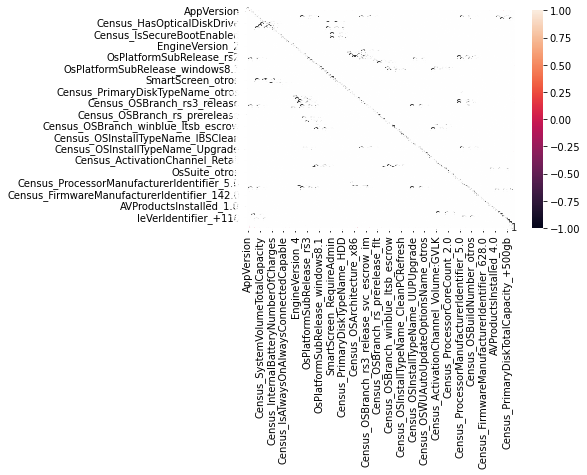

In [ ]:
sns.heatmap(X.corr(),annot=True)
plt.show()

In [ ]:
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]
    
    return Z
    
highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,Census_OSBranch_rs2_release,OsPlatformSubRelease_rs2,0.979476,0.012663,0.012728,Census_OSBranch_rs2_release
1,Census_OSBranch_rs4_release,OsPlatformSubRelease_rs4,0.964976,0.040620,0.037475,OsPlatformSubRelease_rs4
2,OsSuite_256,SkuEdition_Pro,0.970708,0.020719,0.019553,SkuEdition_Pro
3,OsSuite_768,SkuEdition_Home,0.988658,0.019820,0.018514,SkuEdition_Home
4,Census_ProcessorManufacturerIdentifier_10.0,Census_OSArchitecture_arm64,1.000000,0.005299,0.005299,Census_OSArchitecture_arm64
5,Census_OSBuildNumber_16299,OsPlatformSubRelease_rs3,0.963043,0.012616,0.010787,OsPlatformSubRelease_rs3
6,Census_OSBuildNumber_17134,OsPlatformSubRelease_rs4,0.964900,0.040628,0.037475,OsPlatformSubRelease_rs4
7,Census_OSBuildNumber_17134,Census_OSBranch_rs4_release,0.999911,0.040628,0.040620,Census_OSBranch_rs4_release


In [ ]:
X.drop(axis=1, columns=highly_corr['F_to_delete'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498291 entries, 0 to 499999
Columns: 115 entries, AppVersion to Census_TotalPhysicalRAM_<=4gb
dtypes: float64(10), int64(8), uint8(97)
memory usage: 118.3 MB


## Remove Low-Variance

* Eliminamos variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),'low variance features were removed:\n', cols_lowvar.to_list())

19 low variance features were removed:
 ['OsPlatformSubRelease_prers5', 'Census_OSBranch_rs3_release_svc_escrow_im', 'Census_OSBranch_rs5_release', 'Census_OSBranch_rs5_release_sigma', 'Census_OSBranch_rs_prerelease', 'Census_OSBranch_rs_prerelease_flt', 'Census_OSBranch_th1', 'Census_OSBranch_winblue_ltsb_escrow', 'Census_OSInstallTypeName_Clean', 'Census_OSInstallTypeName_CleanPCRefresh', 'Census_ActivationChannel_Retail:TB:Eval', 'Census_ActivationChannel_Volume:MAK', 'OsSuite_otros', 'Census_ProcessorManufacturerIdentifier_3.0', 'Census_ProcessorManufacturerIdentifier_10.0', 'Census_ProcessorManufacturerIdentifier_otros', 'AVProductsInstalled_4.0', 'AVProductsInstalled_5.0', 'AVProductsInstalled_1']


In [ ]:
df.shape

(498291, 115)

In [ ]:
df.head()

,AppVersion,AvSigVersion,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuild,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,...,AVProductsInstalled_3.0,AVProductsInstalled_4.0,AVProductsInstalled_5.0,AVProductsInstalled_1,IeVerIdentifier_+110,IeVerIdentifier_<=110,Census_PrimaryDiskTotalCapacity_+500gb,Census_PrimaryDiskTotalCapacity_<=500gb,Census_TotalPhysicalRAM_+4gb,Census_TotalPhysicalRAM_<=4gb
0,8.0,10.0,8,172,17134,952838.0,0,169.0,341.0,316.0,...,0,0,0,0,1,0,1,0,1,0
1,8.0,10.0,129,124,17134,457600.0,0,71.0,125.0,89.0,...,0,0,0,0,1,0,0,1,1,0
2,14.0,10.0,149,56,10586,221251.0,0,94.0,341.0,316.0,...,0,0,0,0,0,1,0,1,1,0
3,8.0,10.0,164,172,17134,228321.0,0,94.0,341.0,316.0,...,0,0,0,0,1,0,0,1,1,0
4,8.0,10.0,207,75,17134,464374.0,0,94.0,161.0,114.0,...,0,0,0,0,1,0,0,1,0,1


In [ ]:
df.columns = df.columns.str.replace('<=', '_')

# Save cleaned dataset

In [ ]:
df.to_csv('/content/drive/MyDrive/NUCLIO DSC ML SUPERVISADO - Compartida 2/“DSC0922 – Entregable SupML - {Rojas}”/TEMPLATE-Sup-ML-main/clean_data.csv',index= False)